# EDA
 - before covid and lockdown

In [37]:
from google.colab import drive
drive.mount("/content/drive/")
%cd "drive/My Drive/"


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
[Errno 2] No such file or directory: 'drive/My Drive/'
/content/drive/.shortcut-targets-by-id/1L9_g5eG75GYICVKt3zWeiKeDbqXPwoTg/twitter_data_food_quantity


In [38]:
%cd "twitter_data_food_quantity"

[Errno 2] No such file or directory: 'twitter_data_food_quantity'
/content/drive/.shortcut-targets-by-id/1L9_g5eG75GYICVKt3zWeiKeDbqXPwoTg/twitter_data_food_quantity


In [39]:
!ls

kenya  nigeria	south_africa


In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
import datetime

In [41]:
import nltk
from textblob import TextBlob

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [42]:
def to_date(datas):
    for data in datas:
        data.created_at = data.created_at.dt.strftime('%Y-%m-%d')
        data.created_at = pd.to_datetime(data.created_at)

## Kenya

In [43]:
# after_covid_kenya = pd.read_csv("/Untitled Folder 2/after_covid_kenya.csv",parse_dates=['created_at'])
after_lockdown_Nairobi = pd.read_csv("kenya/after_lockdown_kenya.csv",parse_dates=['created_at'])
# before_covid_kenya = pd.read_csv("before_covid_kenya.csv",parse_dates=['created_at'])
before_lockdown_Nairobi = pd.read_csv("kenya/before_lockdown_kenya.csv",parse_dates=['created_at'])
during_lockdown_Nairobi = pd.read_csv("kenya/during_lockdown_kenya.csv",parse_dates=['created_at'])

In [ ]:
before_lockdown_Nairobi

In [ ]:
from matplotlib  import rcParams

%matplotlib inline
rcParams["figure.figsize"] = 16,6
c = '#386B7F'

In [135]:
datas = [before_lockdown_Nairobi,during_lockdown_Nairobi,after_lockdown_Nairobi]


In [141]:
to_date(datas)

In [142]:
datas[0]

,Unnamed: 0,Unnamed: 0.1,id,created_at,screen_name,retweet_count,favorite_count,text
0,8185,1966,1.227875e+18,2020-02-13,1023KISSFM,0.0,0.0,#HealthtipswithAntoinette foods you should nev...
1,27082,1215,1.252118e+18,2020-04-20,ICRAF,1.0,6.0,Mitigation strategies are urgently needed to c...
2,27086,1219,1.251110e+18,2020-04-17,ICRAF,0.0,3.0,What's #COVID19's impact on the #foodsystems o...
3,27096,1229,1.250378e+18,2020-04-15,ICRAF,8.0,18.0,#Publication| Livelihoods and wider social ben...
4,27112,1245,1.248240e+18,2020-04-09,ICRAF,14.0,35.0,#Agroforestry interventions can make a huge im...
...,...,...,...,...,...,...,...,...
1316,1124253,1494,1.214420e+18,2020-01-07,FoodBizAfrica,0.0,0.0,#NEWS #FoodBusinessAfrica #FoodWorldMedia #Afr...
1317,1124254,1495,1.214419e+18,2020-01-07,FoodBizAfrica,0.0,0.0,#NEWS #FoodBusinessAfrica #FoodWorldMedia #Afr...
1318,1124255,1496,1.214419e+18,2020-01-07,FoodBizAfrica,0.0,1.0,#NEWS #FoodBusinessAfrica #FoodWorldMedia #Afr...
1319,1124256,1497,1.214061e+18,2020-01-06,FoodBizAfrica,1.0,0.0,"Happy new year from Africas No. 1 #Food, #Beve..."


In [119]:

datas = [data.groupby(["screen_name"])['text'].apply(lambda x: ','.join(x)).reset_index() for data in datas]

In [120]:
datas[0]

,screen_name,text
0,1023KISSFM,#HealthtipswithAntoinette foods you should nev...
1,3adcompany,"Complain, then still take it because you dont ..."
2,ACODE_Uganda,New #GreenEconomy Barometer report says we mus...
3,AKlegacyUG,"GIRLS are like; ''Take me out on a date, buy m..."
4,ASARECA,"As the world continues to fight #COVID19, #foo..."
...,...,...
192,songajames123,Eight things you need to know about govt food ...
193,ug_edge,Kakiri police stopped a truck and motorcycle s...
194,undptz,Garlic is a healthy food that may have some an...
195,unicefrw,Did you know? Breastmilk alone is the best foo...


In [128]:
# Create a list of lists containing lowercase words for each tweet
import nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

words_in_tweet_bn = [re.findall(r'[#]\w+', text) for text in datas[0].text]

words_in_tweet_dn = [re.findall(r'[#]\w+', text) for text in datas[1].text]

              
words_in_tweet_an = [re.findall(r'[#]\w+', text) for text in datas[2].text]

# words_in_tweet_an = [[word for word in tweet_words if not word in stop_words]
#               for tweet_words in words_in_tweet_an]




In [129]:
# List of all words across tweets
import itertools
import collections


all_words_bn = list(itertools.chain(*words_in_tweet_bn))
all_words_dn = list(itertools.chain(*words_in_tweet_dn))
all_words_an = list(itertools.chain(*words_in_tweet_an))


# Create counter
counts_no_bn = collections.Counter(all_words_bn)
counts_no_dn = collections.Counter(all_words_dn)
counts_no_an = collections.Counter(all_words_an)

# counts_no.most_common(15)

In [130]:

count_words_bn = pd.DataFrame(counts_no_bn.most_common(15), columns=['words', 'count'])
count_words_dn = pd.DataFrame(counts_no_dn.most_common(15), columns=['words', 'count'])
count_words_an = pd.DataFrame(counts_no_an.most_common(15), columns=['words', 'count'])

count_words_bn

,words,count
0,#Africa,584
1,#NEWS,569
2,#FoodBusinessAfrica,569
3,#FoodWorldMedia,569
4,#World,569
5,#DairyIndustry,569
6,#MillingIndustry,569
7,#BeverageIndustry,569
8,#foodsecurity,33
9,#food,28


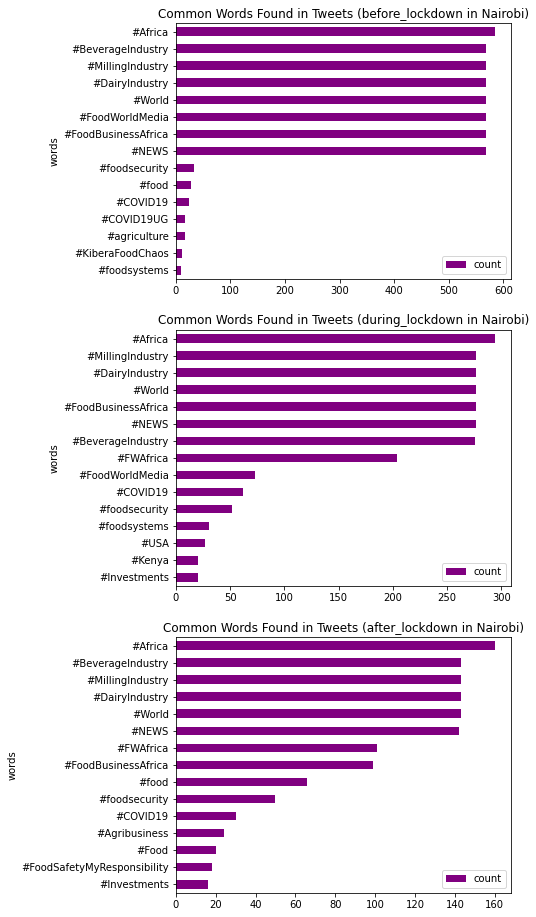

In [134]:
# fig, ax = plt.subplots(sub_pl3,1figsize=(8, 8))
fig, (ax1, ax2,ax3) = plt.subplots(3, 1,figsize=(6, 16))

# Plot horizontal bar graph
count_words_bn.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax1,
                      color="purple")

ax1.set_title("Common Words Found in Tweets (before_lockdown in Nairobi)")

# Plot horizontal bar graph
count_words_dn.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax2,
                      color="purple")

ax2.set_title("Common Words Found in Tweets (during_lockdown in Nairobi)")

# Plot horizontal bar graph
count_words_an.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax3,
                      color="purple")

ax3.set_title("Common Words Found in Tweets (after_lockdown in Nairobi)")

plt.show()

In [140]:
datas[0].groupby(["screen_name"]).agg({"text":"count"}).sort_values(by ="text",ascending=False)

,text
screen_name,
FoodBizAfrica,602
AfricaSustain1,41
AgricultureNan,34
ChadDigo,32
UgandaRedCross,24
...,...
MohamudNadif,1
MitiAlliance,1
MarubeKiage,1


In [143]:
datas[1].groupby(["screen_name"]).agg({"text":"count"}).sort_values(by ="text",ascending=False)

,text
screen_name,
FoodBizAfrica,286
ICRAF,97
Consumers_Kenya,34
AgricultureNan,25
Kenya_2U,24
...,...
EugeneRwubaka,1
FelixRugamba2,1
StormyPetrel228,1


In [144]:
datas[2].groupby(["screen_name"]).agg({"text":"count"}).sort_values(by ="text",ascending=False)

,text
screen_name,
FoodBizAfrica,182
ICRAF,55
Consumers_Kenya,51
AfricaSustain1,39
hiramkush,32
...,...
Saitonne,1
Sam_Chyme,1
Shucayb_Shekeye,1



# Johannesburg

In [ ]:
after_ld_Johannesburg = pd.read_csv("south_africa/after_lockdown_south_africa.csv",parse_dates=['created_at'])
before_ld_Johannesburg = pd.read_csv("south_africa/before_lockdown_south_africa.csv",parse_dates=['created_at'])
during_ld_Johannesburg = pd.read_csv("south_africa/during_lockdown_south_africa.csv",parse_dates=['created_at'])

In [ ]:
datas_j = [before_ld_Johannesburg,during_ld_Johannesburg,after_ld_Johannesburg]

In [ ]:
to_date(datas)

# Lagos

In [ ]:
after_ld_Lagos = pd.read_csv("nigeria/after_lockdown_nigeria.csv",parse_dates=['created_at'])
before_ld_Lagos = pd.read_csv("nigeria/before_lockdown_nigeria.csv",parse_dates=['created_at'])
during_ld_Lagos = pd.read_csv("nigeria/during_lockdown_nigeria.csv",parse_dates=['created_at'])

In [ ]:
datas_L = [before_ld_Lagos,after_ld_Lagos,during_ld_Lagos]

NameError: ignored

In [ ]:
to_date(datas)